In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import plotly.express as px

In [2]:
!wget https://www.dropbox.com/s/la881hl7h0c3vtw/Consumo_cerveja.csv

--2023-07-22 19:19:41--  https://www.dropbox.com/s/la881hl7h0c3vtw/Consumo_cerveja.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/la881hl7h0c3vtw/Consumo_cerveja.csv [following]
--2023-07-22 19:19:41--  https://www.dropbox.com/s/raw/la881hl7h0c3vtw/Consumo_cerveja.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf78d9d57d4bb092ebd3b5ecb05.dl.dropboxusercontent.com/cd/0/inline/CAUi-NkqXkD0vxd63uRJn1f3zWW2k-rHHEkgAnWFpTsbFe288qnucobtVWofVn6otDJec-2GzZnaWNC6uDHIIyAmke7Nsx6mJnp-zvLrnd_8LDdxhaNW0fZqZplZ-DSKyZd2PX93cPeAqc1IdnIBRZpAa9Uf_AcEg6qCHq26dKouAA/file# [following]
--2023-07-22 19:19:42--  https://ucf78d9d57d4bb092ebd3b5ecb05.dl.dropboxusercontent.com/cd/0/inline/CAUi-NkqXkD0vxd63uRJn1f3zWW2k-rHHEkgAnWFpTsbFe288qnucobtVWo

In [ ]:
beer_data = pd.read_csv("/content/Consumo_cerveja.csv")

In [ ]:
beer_data.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [ ]:
beer_data.columns

Index(['Data', 'Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)'],
      dtype='object')

In [ ]:
beer_data.shape

(941, 7)

In [ ]:
beer_data.describe()

,Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000
mean,0.284932,25.401367
std,0.452001,4.399143
min,0.000000,14.343000
25%,0.000000,22.008000
50%,0.000000,24.867000
75%,1.000000,28.631000
max,1.000000,37.937000


In [ ]:
beer_data.isna().any()

Data                           True
Temperatura Media (C)          True
Temperatura Minima (C)         True
Temperatura Maxima (C)         True
Precipitacao (mm)              True
Final de Semana                True
Consumo de cerveja (litros)    True
dtype: bool

In [ ]:
#Drooping rows with all NAN Values
beer_data.dropna(how='all',inplace = True)

In [ ]:
# Replacing commas with period
beer_data.replace({',':'.'}, regex = True,inplace =True)

In [ ]:
# Converting the type of Data to Date time
beer_data['Data'] = pd.to_datetime(beer_data['Data'])

In [ ]:
beer_data.info()
days = ['Monday','Tuesday','Wednesday','Thrusday','Friday','Saturday','Sunday']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Data                         365 non-null    datetime64[ns]
 1   Temperatura Media (C)        365 non-null    object        
 2   Temperatura Minima (C)       365 non-null    object        
 3   Temperatura Maxima (C)       365 non-null    object        
 4   Precipitacao (mm)            365 non-null    object        
 5   Final de Semana              365 non-null    float64       
 6   Consumo de cerveja (litros)  365 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 22.8+ KB


In [ ]:
beer_data['Day'] = beer_data['Data'].apply(lambda a: days[a.weekday()])

In [ ]:
beer_data.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Day
0,2015-01-01,27.3,23.9,32.5,0,0.0,25.461,Thrusday
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972,Friday
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814,Saturday
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,Sunday
4,2015-01-05,23.82,21,28.3,0,0.0,28.900,Monday


In [ ]:
beer_data.columns

Index(['Data', 'Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)', 'Day'],
      dtype='object')

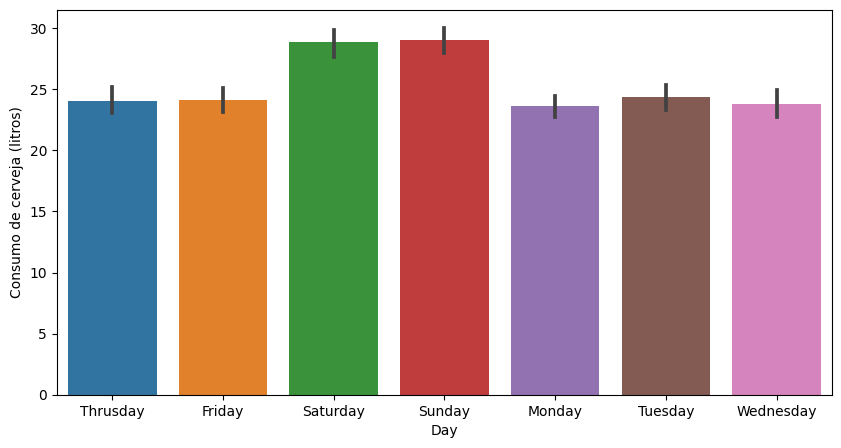

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x = "Day",y = "Consumo de cerveja (litros)",data = beer_data)

In [ ]:
px.bar(beer_data,x = "Day",y = "Consumo de cerveja (litros)",color='Day')

In [ ]:
beer_data.drop(['Data','Day'],axis =1,inplace = True)

In [ ]:
# Converting temperature and rainfall columns unto float type
beer_data = beer_data.apply(pd.to_numeric)

In [ ]:
beer_data

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,27.30,23.9,32.5,0.0,0.0,25.461
1,27.02,24.5,33.5,0.0,0.0,28.972
2,24.82,22.4,29.9,0.0,1.0,30.814
3,23.98,21.5,28.6,1.2,1.0,29.799
4,23.82,21.0,28.3,0.0,0.0,28.900
...,...,...,...,...,...,...
360,24.00,21.1,28.2,13.6,1.0,32.307
361,22.64,21.1,26.7,0.0,0.0,26.095
362,21.68,20.3,24.1,10.3,0.0,22.309
363,21.38,19.3,22.4,6.3,0.0,20.467


In [ ]:
from sklearn.model_selection import train_test_split
x = beer_data.drop('Consumo de cerveja (litros)',axis = 1) # drop the target variable

In [ ]:
y = beer_data['Consumo de cerveja (litros)']

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.2,random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
L = LinearRegression()

In [ ]:
L.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
y_pred = L.predict(xtest)

In [ ]:
print(L.score(xtest,ytest))

0.7427938181737359
